# 임베딩 내 편향성 알아보기 [프로젝트]


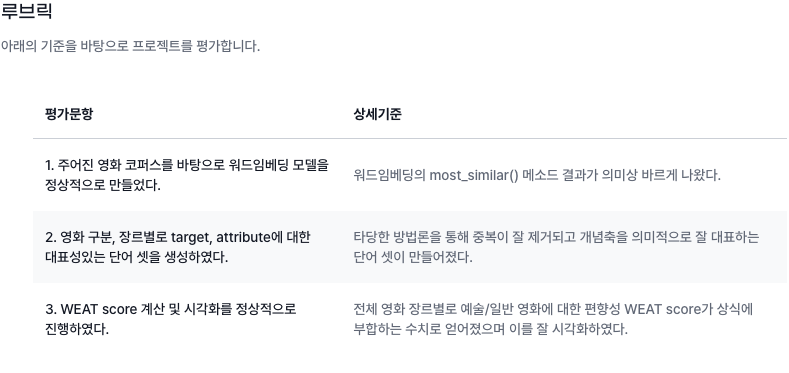

## STEP 1. 형태소 분석기를 이용하여 품사가 명사인 경우 해당 단어를 추출하기

In [2]:
# data load
import os

with open(os.getenv('HOME')+'/GoingDeeper/data/weat/synopsis.txt', 'r') as file:
    for i in range(20):
        print(file.readline(), end='')

사운드 엔지니어 상우(유지태 분)는 치매에 걸린 할머니(백성희 분)와
 젊은 시절 상처한 한 아버지(박인환 분), 고모(신신애 분)와 함께 살고 있다.
 어느 겨울 그는 지방 방송국 라디오 PD 은수(이영애 분)를 만난다.
 자연의 소리를 채집해 틀어주는 라디오 프로그램을 준비하는 은수는 상우와 녹음 여행을 떠난다.
 자연스레 가까워지는 두 사람은 어느 날, 은수의 아파트에서 밤을 보낸다.
 너무 쉽게 사랑에 빠진 두 사람... 상우는 주체할 수 없을 정도로 그녀에게 빨려든다.
 그러나 겨울에 만난 두 사람의 관계는 봄을 지나 여름을 맞이하면서 삐걱거린다.
 이혼 경험이 있는 은수는 상우에게 결혼할 생각이 없다며 부담스러운 표정을 내비친다.
 "어떻게 사랑이 변하니?..."라고 묻는 상우에게 은수는 그저 "헤어져" 라고 단호하게 말한다.
 영원히 변할 것 같지 않던 사랑이 변하고, 그 사실을 받아들이지 못하는 상우는 어찌 할 바를 모른다.
 은수를 잊지 못하는 상우는 미련과 집착의 감정을 이기지 못하고 서울과 강릉을 오간다.
유사 이래 연령, 성별, 빈부의 차이와 정치적인 입장을 불문하고 일거에 국민을 통합해 온 '애국심'이라는 성역에 일침을 가하는 다큐멘터리. 재작년 전국 민족민주 유가족협의회의 장기농성을 다룬 인상적인 다큐멘터리 <민들레>를 만들었던 독립영화집단 '빨간 눈사람'이 우리 사회 구석구석을 발빠르게 돌아다니며 애국심과 민족주의가 강요되는 현장을 발굴하여 카메라에 담았다. 박홍 서강대 명예총장, 이도형 '한국논단' 발행인, 축구해설자 신문선, 홍세화, 박노해 등 사회 각계의 '스타'들이 등장해 저마다의 확고한 신념을 성토한다. 감독 이경순과 최하동하는 이 작품을 위해 3년간 백여 명을 인터뷰했다고 한다. 2001 올해의 독립영화상 수상.
 민족과 국가란 공동체에서 부단히 권력과 부를 얻는 자, 나아가 민족과 국가란 공동체에서 얻은 신분과 부귀를 영원히 그의 자손에게 대물림하려는 자, 그래서 민족과 국가란 공동체를 부단히 유지해야만 하는 자, 따라서

실습에서 okt를 사용하여 프로젝트에서는 mecab을 사용하여 진행

품사 태그 - 체언

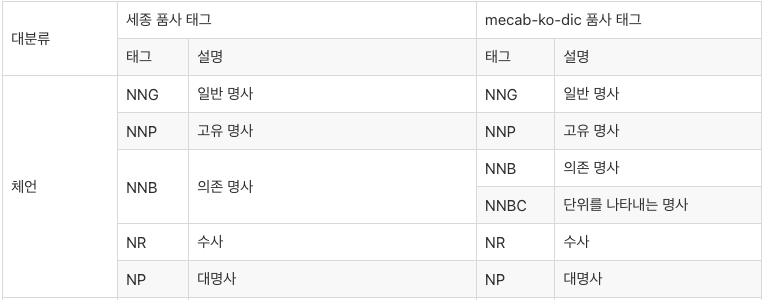

[KoNLPy 형태소 분석기 품사 태그 비교](https://datascienceschool.net/03%20machine%20learning/03.01.02%20KoNLPy%20%ED%95%9C%EA%B5%AD%EC%96%B4%20%EC%B2%98%EB%A6%AC%20%ED%8C%A8%ED%82%A4%EC%A7%80.html)

In [3]:
# mecab 활용
from konlpy.tag import Mecab
mecab = Mecab()
tokenized = []
with open(os.getenv('HOME')+'/GoingDeeper/data/weat/synopsis.txt', 'r') as file:
    while True:
        line = file.readline()
        if not line: break
        words = mecab.pos(line)
        res = []
        # 명사만 추출
        for word in words:
            if word[1] in ['NNG', 'NNP', 'NNB', 'NNBC', 'NP', 'NR']:
                res.append(word[0])
        tokenized.append(res)

In [4]:
print(len(tokenized))

71156


## STEP 2. 추출된 결과로 embedding model 만들기

In [5]:
from gensim.models import Word2Vec

# tokenized에 담긴 데이터를 가지고 Word2Vec 모델을 학습 (gensim 4.0 기준) - cbow 사용(sg=0), skip-gram은 sg=1
model = Word2Vec(sentences=tokenized, vector_size=100, window=5, min_count = 3,sg=1, workers=4)
model.wv.most_similar(positive=['영화'])

[('주제', 0.734704315662384),
 ('작품', 0.7334187626838684),
 ('형식', 0.7274777889251709),
 ('픽션', 0.7132143378257751),
 ('전작', 0.7111601233482361),
 ('옴니버스', 0.709695041179657),
 ('후반부', 0.7078418135643005),
 ('신작', 0.7066482305526733),
 ('나레이션', 0.7059609889984131),
 ('서사', 0.7020701766014099)]

In [6]:
model.wv.most_similar(positive=['사랑'])

[('마르코', 0.6645309329032898),
 ('친밀감', 0.6587116122245789),
 ('로미오', 0.6565098762512207),
 ('진심', 0.6439400911331177),
 ('소울메이트', 0.6404021382331848),
 ('연인', 0.635433554649353),
 ('다아시', 0.6344234943389893),
 ('완다', 0.6335896849632263),
 ('결별', 0.6326279640197754),
 ('타이밍', 0.6314170360565186)]

In [7]:
model.wv.most_similar(positive=['연극'])

[('대본', 0.8418789505958557),
 ('리허설', 0.8118899464607239),
 ('햄릿', 0.8078257441520691),
 ('스탭', 0.7870470285415649),
 ('연기자', 0.7807105183601379),
 ('아역', 0.779591977596283),
 ('조연', 0.7701740860939026),
 ('조감독', 0.7680119872093201),
 ('미완성', 0.7660549283027649),
 ('연출가', 0.7649278044700623)]

## STEP 3. target, attribute 단어 셋 만들기

TF-IDF로 해당 데이터를 가장 잘 표현하는 단어 셋 만들기

두 축을 영화 장르, 영화 구분 정보로 이용
- 영화 구분
  - synopsis_art.txt : 예술영화
  - synopsis_gen.txt : 일반영화(상업영화)

- 장르 구분
  - synopsis_SF.txt: SF
  - synopsis_family.txt : 가족
  - synopsis_show.txt : 공연
  - synopsis_horror.txt : 공포(호러)
  - synopsis_documentary.txt : 다큐멘터리
  - synopsis_drama.txt : 드라마
  - synopsis_romance.txt : 멜로로맨스
  - synopsis_mystery.txt : 미스터리
  - synopsis_crime.txt : 범죄
  - synopsis_historical.txt : 사극
  - synopsis_western.txt : 서부극(웨스턴)
  - synopsis_adult.txt : 성인물(에로)
  - synopsis_thriller.txt : 스릴러
  - synopsis_animation.txt : 에니메이션
  - synopsis_action.txt : 액션
  - synopsis_adventure.txt : 어드벤처
  - synopsis_war.txt : 전쟁
  - synopsis_comedy.txt : 코미디
  - synopsis_fantasy.txt : 판타지

'synopsis_art.txt', 'synopsis_gen.txt' 두 파일을 읽고, 위에서 했던 것과 마찬가지로 명사에 대해서만 추출

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

art_txt = 'synopsis_art.txt'
gen_txt = 'synopsis_gen.txt'

def read_token(file_name):
    mecab = Mecab()
    result = []
    with open(os.getenv('HOME')+'/GoingDeeper/data/weat/'+file_name, 'r') as file:
        print(file_name, '파일을 읽고 있습니다.')
        while True:
            line = file.readline()
            if not line: break
            # 명사 추출
            tokenlist = mecab.pos(line)
            for word in tokenlist:
                if word[1] in ['NNG', 'NNP', 'NNB', 'NNBC', 'NP', 'NR']:
                    result.append(word[0])
    return ' '.join(result)

In [9]:
art = read_token(art_txt)
gen = read_token(gen_txt)

synopsis_art.txt 파일을 읽고 있습니다.
synopsis_gen.txt 파일을 읽고 있습니다.


예술영화를 잘 대표하는 단어란 예술영화 시놉시스에는 자주 나타나지만\
그 외 다른 구분의 영화(예를 들어 일반영화) 시놉시스에는 자주 나타나지 않는 것을 고르는 것
-> TF-IDF

### 영화 구분

In [10]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform([art, gen])

print(X.shape)

(2, 43586)


In [11]:
# '영화'라는 단어가 벡터화된 단어 리스트에서 몇 번째 인덱스에 있는지 확인
print(vectorizer.vocabulary_['영화'])
# 25457번 인덱스에 해당하는 단어가 무엇인지 확인
print(vectorizer.get_feature_names_out()[25457])

25457
영화


In [12]:
m1 = X[0].tocoo() # art 장르에 대한 sparse matrix - tfidf
m2 = X[1].tocoo() # gen 장르에 대한 sparse matrix - tfidf

w1 = [[i, j] for i, j in zip(m1.col, m1.data)] # art 장르에 대한 단어별 tfidf 값
w2 = [[i, j] for i, j in zip(m2.col, m2.data)] # gen 장르에 대한 단어별 tfidf 값

w1.sort(key=lambda x: x[1], reverse=True) # tfidf 역순으로 정렬
w2.sort(key=lambda x: x[1], reverse=True) # tfidf 역순으로 정렬

# 상위 100개 단어
print('예술영화를 대표하는 단어들 :')
for i in range(100):
    print(vectorizer.get_feature_names_out()[w1[i][0]], end=', ')
    
print('\n')

print('일반영화를 대표하는 단어들 :')
for i in range(100):
    print(vectorizer.get_feature_names_out()[w2[i][0]], end=', ')

예술영화를 대표하는 단어들 :
그녀, 자신, 시작, 사랑, 사람, 친구, 영화, 남자, 여자, 가족, 이야기, 마을, 마음, 사건, 시간, 세상, 아버지, 아이, 엄마, 세계, 아들, 소녀, 아내, 영화제, 사이, 하나, 감독, 서로, 남편, 비밀, 여행, 인생, 학교, 우리, 발견, 순간, 사실, 음악, 생활, 아빠, 마지막, 기억, 행복, 모습, 죽음, 소년, 도시, 단편, 사고, 이상, 결혼, 한편, 때문, 위기, 생각, 관계, 성공, 전쟁, 일상, 경찰, 최고, 인간, 현실, 과거, 미국, 상황, 결심, 운명, 여인, 하루, 이름, 이후, 준비, 동안, 위험, 결국, 감정, 충격, 누구, 살인, 부모, 한국, 존재, 연인, 어머니, 희망, 특별, 청년, 국제, 그곳, 시절, 동생, 작가, 작품, 여성, 상처, 모두, 사회, 목숨, 할머니, 

일반영화를 대표하는 단어들 :
자신, 영화제, 그녀, 사람, 시작, 영화, 친구, 국제, 남자, 사랑, 이야기, 여자, 서울, 사건, 남편, 가족, 아이, 아버지, 시간, 세계, 단편, 마을, 엄마, 마음, 아들, 모습, 관계, 감독, 생각, 작품, 사이, 세상, 발견, 아내, 여성, 소녀, 사실, 하나, 우리, 애니메이션, 때문, 이상, 인간, 생활, 죽음, 결혼, 비밀, 상황, 학교, 기억, 도시, 여행, 한편, 소년, 순간, 서로, 경찰, 동안, 과거, 미국, 마지막, 현실, 전쟁, 존재, 일상, 주인공, 사회, 사고, 그곳, 어머니, 연출, 인생, 섹스, 다큐멘터리, 부문, 한국, 살인, 위험, 행복, 최고, 결국, 위기, 동생, 의도, 조직, 회사, 부부, 계획, 이후, 일본, 시절, 성공, 아빠, 문제, 부산, 하루, 음악, 그것, 부모, 운명, 

In [13]:
# 중복이 많아서 중복 제외 상위 15개 단어
n = 15
w1_, w2_ = [], []
for i in range(100):
    w1_.append(vectorizer.get_feature_names_out()[w1[i][0]])
    w2_.append(vectorizer.get_feature_names_out()[w2[i][0]])
    
# w1에만 있고 w2에는 없는, 예술영화를 잘 대표하는 단어 - 15개
target_art, target_gen = [], []
for i in range(100):
    if (w1_[i] not in w2_) and (w1_[i] in model.wv): target_art.append(w1_[i])
    if len(target_art) == n: break
    
# w2에만 있고 w1에는 없는, 일반영화를 잘 대표하는 단어 - 15개
for i in range(100):
    if (w2_[i] not in w1_) and (w2_[i] in model.wv): target_gen.append(w2_[i])
    if len(target_gen) == n: break

In [14]:
print(target_art)

['결심', '여인', '이름', '준비', '감정', '충격', '누구', '연인', '희망', '특별', '청년', '작가', '상처', '모두', '목숨']


In [15]:
print(target_gen)

['서울', '애니메이션', '주인공', '연출', '섹스', '다큐멘터리', '부문', '의도', '조직', '회사', '부부', '계획', '일본', '문제', '부산']


### 장르 구분

In [16]:
# 장르 대표 단어 
genre_txt = ['synopsis_SF.txt', 'synopsis_family.txt', 'synopsis_show.txt', 'synopsis_horror.txt', 'synopsis_etc.txt', 
             'synopsis_documentary.txt', 'synopsis_drama.txt', 'synopsis_romance.txt', 'synopsis_musical.txt', 
             'synopsis_mystery.txt', 'synopsis_crime.txt', 'synopsis_historical.txt', 'synopsis_western.txt', 
             'synopsis_adult.txt', 'synopsis_thriller.txt', 'synopsis_animation.txt', 'synopsis_action.txt', 
             'synopsis_adventure.txt', 'synopsis_war.txt', 'synopsis_comedy.txt', 'synopsis_fantasy.txt']

genre_name = ['SF', '가족', '공연', '공포(호러)', '기타', '다큐멘터리', '드라마', '멜로로맨스', '뮤지컬', '미스터리', '범죄', '사극', '서부극(웨스턴)',
         '성인물(에로)', '스릴러', '애니메이션', '액션', '어드벤처', '전쟁', '코미디', '판타지']

In [17]:
genre = []
for file_name in genre_txt:
    genre.append(read_token(file_name))

synopsis_SF.txt 파일을 읽고 있습니다.
synopsis_family.txt 파일을 읽고 있습니다.
synopsis_show.txt 파일을 읽고 있습니다.
synopsis_horror.txt 파일을 읽고 있습니다.
synopsis_etc.txt 파일을 읽고 있습니다.
synopsis_documentary.txt 파일을 읽고 있습니다.
synopsis_drama.txt 파일을 읽고 있습니다.
synopsis_romance.txt 파일을 읽고 있습니다.
synopsis_musical.txt 파일을 읽고 있습니다.
synopsis_mystery.txt 파일을 읽고 있습니다.
synopsis_crime.txt 파일을 읽고 있습니다.
synopsis_historical.txt 파일을 읽고 있습니다.
synopsis_western.txt 파일을 읽고 있습니다.
synopsis_adult.txt 파일을 읽고 있습니다.
synopsis_thriller.txt 파일을 읽고 있습니다.
synopsis_animation.txt 파일을 읽고 있습니다.
synopsis_action.txt 파일을 읽고 있습니다.
synopsis_adventure.txt 파일을 읽고 있습니다.
synopsis_war.txt 파일을 읽고 있습니다.
synopsis_comedy.txt 파일을 읽고 있습니다.
synopsis_fantasy.txt 파일을 읽고 있습니다.


In [18]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(genre)

print(X.shape)

(21, 44872)


In [19]:
m = [X[i].tocoo() for i in range(X.shape[0])]

w = [[[i, j] for i, j in zip(mm.col, mm.data)] for mm in m]

for i in range(len(w)):
    w[i].sort(key=lambda x: x[1], reverse=True)
attributes = []
for i in range(len(w)):
    print(genre_name[i], end=': ')
    attr = []
    j = 0
    while (len(attr) < 15):
        if vectorizer.get_feature_names_out()[w[i][j][0]] in model.wv:
            attr.append(vectorizer.get_feature_names_out()[w[i][j][0]])
            print(vectorizer.get_feature_names_out()[w[i][j][0]], end=', ')
        j += 1
    attributes.append(attr)
    print()

SF: 자신, 지구, 시작, 사람, 인류, 인간, 세계, 우주, 미래, 그녀, 로봇, 박사, 친구, 외계, 거대, 
가족: 엄마, 아빠, 영화제, 가족, 자신, 친구, 아버지, 시작, 그녀, 아들, 사랑, 마을, 국제, 낙타, 할머니, 
공연: 사랑, 오페라, 비올레타, 실황, 스카르피, 토스카, 백작, 자신, 카바, 레오노라, 그녀, 공연, 알프레도, 오텔로, 리골레토, 
공포(호러): 친구, 시작, 사람, 자신, 그녀, 공포, 사건, 발견, 죽음, 남자, 마을, 영화, 이상, 여자, 가족, 
기타: 영화제, 국제, 서울, 단편, 영화, 자신, 사람, 이야기, 남자, 그녀, 여자, 친구, 사랑, 시작, 페스티벌, 
다큐멘터리: 영화제, 영화, 다큐, 다큐멘터리, 국제, 사람, 이야기, 감독, 자신, 서울, 우리, 세계, 여성, 시작, 그녀, 
드라마: 자신, 영화제, 그녀, 사랑, 영화, 사람, 시작, 남자, 친구, 국제, 여자, 이야기, 엄마, 단편, 가족, 
멜로로맨스: 그녀, 사랑, 남자, 자신, 친구, 여자, 시작, 남편, 사람, 섹스, 마음, 결혼, 아내, 관계, 부부, 
뮤지컬: 뮤지컬, 사랑, 지모도, 에스메랄다, 영화, 프롤, 그녀, 스카르피, 음악, 충무로, 모차르트, 카바, 자신, 영화제, 토스카, 
미스터리: 사건, 그녀, 시작, 자신, 사람, 친구, 사고, 발견, 진실, 죽음, 기억, 남자, 아내, 살인, 민혁, 
범죄: 사건, 자신, 경찰, 시작, 그녀, 범죄, 조직, 살인, 사람, 마약, 형사, 남자, 수사, 여자, 발견, 
사극: 조선, 시작, 사랑, 신기전, 자신, 춘향, 아가멤논, 그녀, 채선, 루안, 황제, 최고, 운명, 사람, 트로이, 
서부극(웨스턴): 아이삭, 보안관, 챔벌린, 서부, 카우보이, 헨리, 마을, 자신, 개릿, 아르만도, 사냥, 레이프, 바인, 시작, 서부극, 
성인물(에로): 그녀, 남편, 성애, 자신, 관계, 남자, 섹스, 정사, 영화, 마사지, 여자, 시작, 친구, 유부녀, 마음, 
스릴러: 자신, 그녀

단어 셋이 적어서 중복 삭제 x

## STEP 4. WEAT score 계산과 시각화

In [20]:
from numpy import dot
from numpy.linalg import norm

def cos_sim(i, j):
    return dot(i, j.T)/(norm(i)*norm(j))

def s(w, A, B):
    c_a = cos_sim(w, A)
    c_b = cos_sim(w, B)
    mean_A = np.mean(c_a, axis=-1)
    mean_B = np.mean(c_b, axis=-1)
    return mean_A - mean_B #, c_a, c_b


def weat_score(X, Y, A, B):
    
    s_X = s(X, A, B)
    s_Y = s(Y, A, B)

    mean_X = np.mean(s_X)
    mean_Y = np.mean(s_Y)
    
    std_dev = np.std(np.concatenate([s_X, s_Y], axis=0))
    
    return  (mean_X-mean_Y)/std_dev

In [21]:
matrix = [[0 for _ in range(len(genre_name))] for _ in range(len(genre_name))]

In [22]:
X = np.array([model.wv[word] for word in target_art])
Y = np.array([model.wv[word] for word in target_gen])

for i in range(len(genre_name)-1):
    for j in range(i+1, len(genre_name)):
        A = np.array([model.wv[word] for word in attributes[i]])
        B = np.array([model.wv[word] for word in attributes[j]])
        matrix[i][j] = weat_score(X, Y, A, B)

In [23]:
# 결과 저장 리스트 초기화
filtered_results = []

for i in range(len(genre_name)-1):
    for j in range(i+1, len(genre_name)):
        # 소수점 3째 자리까지 출력
        score = matrix[i][j]
        print(f'{genre_name[i]} & {genre_name[j]}: {score:.3f}')
        
        # 조건에 맞는 값만 저장
        if score >= 0.8 or score <= -0.8:
            filtered_results.append((genre_name[i], genre_name[j], score))

SF & 가족: -0.151
SF & 공연: -0.670
SF & 공포(호러): -0.551
SF & 기타: 0.614
SF & 다큐멘터리: 0.764
SF & 드라마: 0.310
SF & 멜로로맨스: -0.334
SF & 뮤지컬: 0.316
SF & 미스터리: -0.738
SF & 범죄: 0.080
SF & 사극: -1.083
SF & 서부극(웨스턴): -0.662
SF & 성인물(에로): 0.049
SF & 스릴러: -0.493
SF & 애니메이션: 0.794
SF & 액션: -0.333
SF & 어드벤처: -0.394
SF & 전쟁: 0.169
SF & 코미디: -0.082
SF & 판타지: 0.051
가족 & 공연: -0.702
가족 & 공포(호러): -0.365
가족 & 기타: 1.075
가족 & 다큐멘터리: 1.122
가족 & 드라마: 0.941
가족 & 멜로로맨스: -0.254
가족 & 뮤지컬: 0.740
가족 & 미스터리: -0.510
가족 & 범죄: 0.186
가족 & 사극: -0.844
가족 & 서부극(웨스턴): -0.519
가족 & 성인물(에로): 0.173
가족 & 스릴러: -0.290
가족 & 애니메이션: 1.159
가족 & 액션: -0.100
가족 & 어드벤처: -0.168
가족 & 전쟁: 0.302
가족 & 코미디: 0.163
가족 & 판타지: 0.306
공연 & 공포(호러): 0.400
공연 & 기타: 1.089
공연 & 다큐멘터리: 1.105
공연 & 드라마: 1.035
공연 & 멜로로맨스: 0.258
공연 & 뮤지컬: 1.128
공연 & 미스터리: 0.104
공연 & 범죄: 0.723
공연 & 사극: -0.126
공연 & 서부극(웨스턴): 0.228
공연 & 성인물(에로): 0.806
공연 & 스릴러: 0.385
공연 & 애니메이션: 1.108
공연 & 액션: 0.449
공연 & 어드벤처: 0.548
공연 & 전쟁: 0.655
공연 & 코미디: 0.894
공연 & 판타지: 0.837
공포(호러) & 기타: 0.923
공포(호러)

In [30]:
# 0.8 이상 또는 -0.8 이하인 값 정렬 (절대값 기준 내림차순)
filtered_results = sorted(filtered_results, key=lambda x: (x[2]), reverse=True)

# 0.8 이상 또는 -0.8 이하인 값 출력
print("\nFiltered Results (0.8 이상 또는 -0.8 이하):")
for result in filtered_results:
    if result[2] >= 0.8:
        # 양수 값 출력
        print(f"예술 영화는 {result[0]}, 일반 영화는 {result[1]} 장르에 가깝다, score = {result[2]:.3f}")
    elif result[2] <= -0.8:
        # 음수 값 출력 (값 반대로 설정)
        print(f"예술 영화는 {result[1]}, 일반 영화는 {result[0]} 장르에 가깝다, score = {result[2]:.3f}")


Filtered Results (0.8 이상 또는 -0.8 이하):
예술 영화는 사극, 일반 영화는 애니메이션 장르에 가깝다, score = 1.163
예술 영화는 가족, 일반 영화는 애니메이션 장르에 가깝다, score = 1.159
예술 영화는 공연, 일반 영화는 뮤지컬 장르에 가깝다, score = 1.128
예술 영화는 가족, 일반 영화는 다큐멘터리 장르에 가깝다, score = 1.122
예술 영화는 공연, 일반 영화는 애니메이션 장르에 가깝다, score = 1.108
예술 영화는 공연, 일반 영화는 다큐멘터리 장르에 가깝다, score = 1.105
예술 영화는 공연, 일반 영화는 기타 장르에 가깝다, score = 1.089
예술 영화는 사극, 일반 영화는 판타지 장르에 가깝다, score = 1.088
예술 영화는 드라마, 일반 영화는 애니메이션 장르에 가깝다, score = 1.084
예술 영화는 가족, 일반 영화는 기타 장르에 가깝다, score = 1.075
예술 영화는 공포(호러), 일반 영화는 다큐멘터리 장르에 가깝다, score = 1.060
예술 영화는 멜로로맨스, 일반 영화는 성인물(에로) 장르에 가깝다, score = 1.044
예술 영화는 서부극(웨스턴), 일반 영화는 애니메이션 장르에 가깝다, score = 1.041
예술 영화는 공연, 일반 영화는 드라마 장르에 가깝다, score = 1.035
예술 영화는 사극, 일반 영화는 전쟁 장르에 가깝다, score = 1.023
예술 영화는 공포(호러), 일반 영화는 애니메이션 장르에 가깝다, score = 1.000
예술 영화는 뮤지컬, 일반 영화는 애니메이션 장르에 가깝다, score = 0.993
예술 영화는 사극, 일반 영화는 코미디 장르에 가깝다, score = 0.992
예술 영화는 미스터리, 일반 영화는 애니메이션 장르에 가깝다, score = 0.992
예술 영화는 기타, 일반 영화는 애니메이션 장르에 가깝다, score = 0.980
예술 영화는 가족, 일반 영

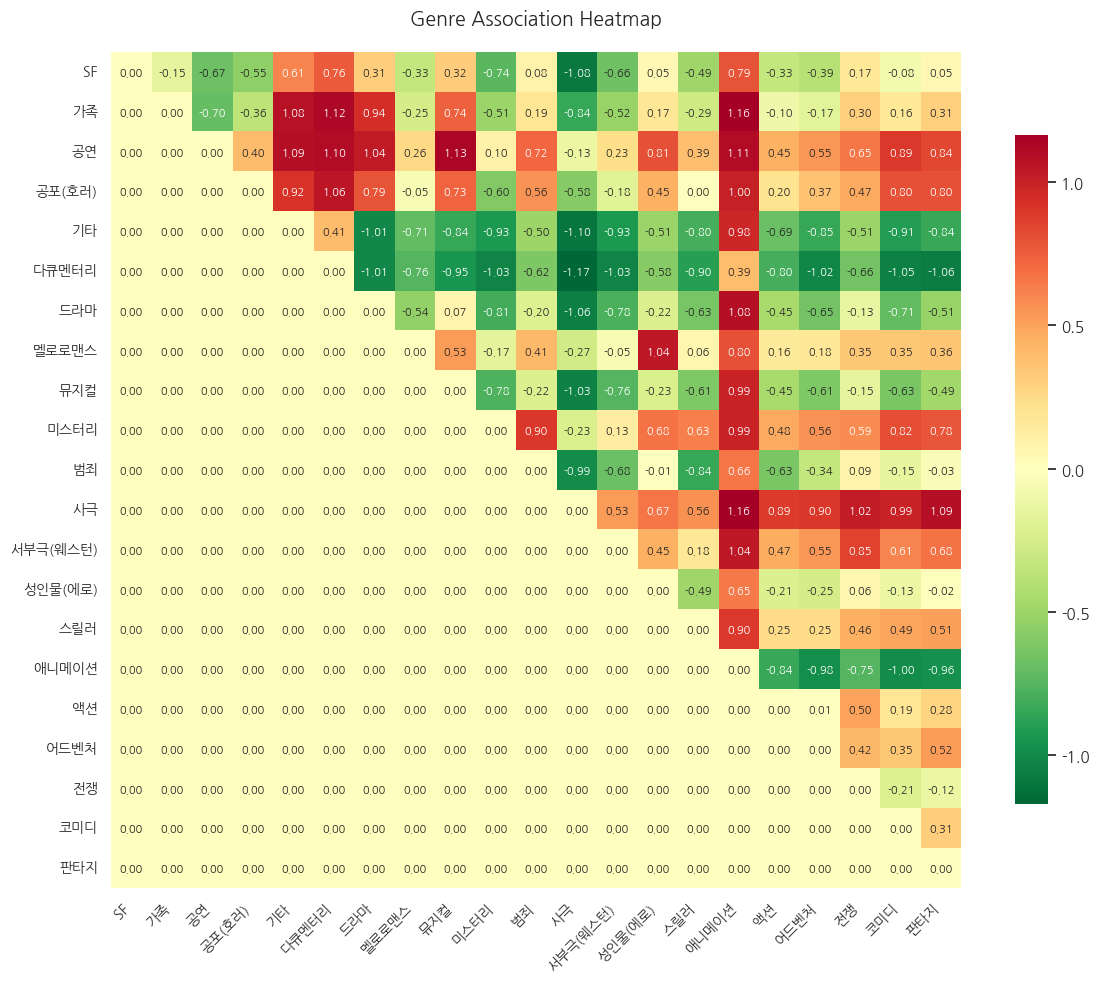

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns; 

np.random.seed(0)

# 한글 지원 폰트
sns.set(font='NanumGothic')

# 마이너스 부호
plt.rcParams['axes.unicode_minus'] = False

# 히트맵 시각화
plt.figure(figsize=(12, 10))  
ax = sns.heatmap(matrix, 
                 xticklabels=genre_name, 
                 yticklabels=genre_name, 
                 annot=True, 
                 fmt='.2f',  
                 annot_kws={"size": 8}, 
                 cmap='RdYlGn_r', 
                 cbar_kws={'shrink': 0.8})  

# x축, y축 라벨 회전
plt.xticks(rotation=45, ha='right', fontsize=10)  # x축 라벨 각도와 정렬
plt.yticks(fontsize=10)  # y축 라벨 크기 조정

# 제목 설정 
plt.title("Genre Association Heatmap", fontsize=14, pad=20)

# 히트맵 출력
plt.tight_layout()  # 레이아웃 조정 
plt.show()